dataset ini tidak melakukan cleaning data dikarenakan dataset ini sudah clean sebelum didownlaod

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
df = pd.read_csv('/content/mushroom_cleaned.csv')

In [17]:
print(df.isnull().sum())

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64


pada bagian ini memeriksa apakah ada nilai null atau kosong dalam dataset. Anda mencetak jumlah nilai null untuk setiap kolom.


In [16]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == object:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

pada bagian ini dilakukan encoding pada kolom-kolom yang memiliki tipe data object (kategori) menjadi nilai numerik menggunakan LabelEncoder dari sklearn.

In [18]:
X = df.drop('cap-diameter', axis=1)
y = df['cap-diameter']

pada bagian ini dialkukan pemisahan fitur (X) dari label (y) dan menetapkan kolom 'cap-diameter' sebagai label.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pada bagian ini dilakukan pembagian data menjadi data latih dan data uji dengan proporsi 80% untuk latih dan 20% untuk uji. random_state=42 memastikan hasil pembagian data yang konsisten.


In [20]:
model = DecisionTreeClassifier(random_state=42)


pada bagian ini dilakukan proses inisialisasi model Decision Tree dengan parameter random_state=42 untuk memastikan hasil yang konsisten.

In [21]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


bagian ini dilakukan cross-validation dengan 5 lipatan (5-fold). Cross-validation digunakan untuk mengevaluasi kinerja model secara lebih handal.


In [9]:
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.0049734  0.00566736 0.00613    0.00786582 0.00890688]
Mean cross-validation score: 0.0067086924057595


In [22]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

bagian ini melatih model Decision Tree menggunakan data latih.


In [23]:
y_pred = model.predict(X_test)

bagian ini menggunakan model yang telah dilatih untuk memprediksi label pada data uji.

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

         539       0.00      0.00      0.00       1.0
         540       0.00      0.00      0.00       1.0
         547       0.00      0.00      0.00       0.0
         563       0.00      0.00      0.00       0.0
         566       0.00      0.00      0.00       1.0
         570       0.00      0.00      0.00       1.0
         573       0.00      0.00      0.00       1.0
         576       0.00      0.00      0.00       0.0
         579       0.00      0.00      0.00       1.0
         580       0.00      0.00      0.00       0.0
         583       0.00      0.00      0.00       0.0
         587       0.00      0.00      0.00       1.0
         591       0.00      0.00      0.00       1.0
         592       0.00      0.00      0.00       1.0
         593       0.00      0.00      0.00       1.0
         594       0.00      0.00      0.00       0.0
         595       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

bagian ini menghitung akurasi prediksi model, mencetak laporan klasifikasi yang berisi metrik-metrik seperti precision, recall, f1-score untuk setiap kelas, dan mencetak matriks kebingungan yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.




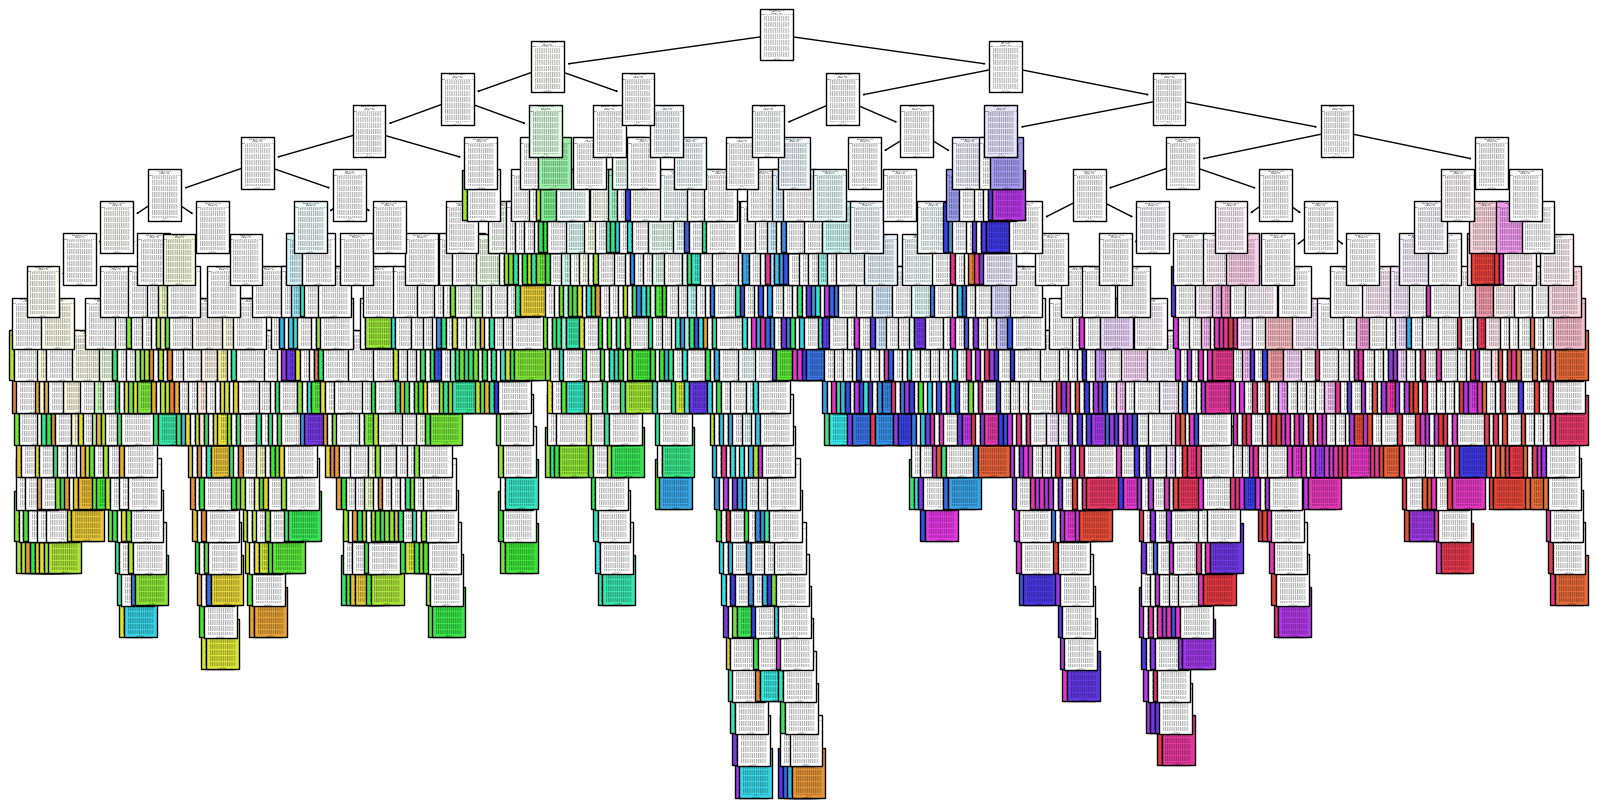

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()